In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
path = "F:/ML/CPI/Weighted_CPI_Forecasting/featured_cpi.csv"

In [3]:
weighted_cpi= pd.read_csv(path)
weighted_cpi.head()

,Date,Weighted_CPI,CPI_pct_change,CPI_yoy_change,Month,Year,Is_start_of_year,Lag_1,Lag_2,Lag_3,CPI_roll_mean_3,CPI_roll_std_3,Month_sin,Month_cos
0,2017-09-01,135.060198,-0.442645,2.696507,9,2017,0,135.660694,134.320657,131.970719,135.013850,0.671220,-1.000000e+00,-1.836970e-16
1,2017-10-01,135.825105,0.566345,2.872447,10,2017,0,135.060198,135.660694,134.320657,135.515333,0.402639,-8.660254e-01,5.000000e-01
2,2017-11-01,137.227596,1.032571,4.181349,11,2017,0,135.825105,135.060198,135.660694,136.037633,1.099218,-5.000000e-01,8.660254e-01
3,2017-12-01,136.440273,-0.573735,4.502199,12,2017,0,137.227596,135.825105,135.060198,136.497658,0.703004,-2.449294e-16,1.000000e+00
4,2018-01-01,135.917088,-0.383453,4.364425,1,2018,1,136.440273,137.227596,135.825105,136.528319,0.659676,5.000000e-01,8.660254e-01


For time series data like CPI, we should not shuffle the data randomly. Instead, we split it chronologically.
Hence, split the data so that Training data covers September 2016 to December 2023 whereas Test data covers January 2024 to April 2025.

In [4]:
# Sort chronologically (precautionary)
weighted_cpi = weighted_cpi.sort_values("Date").reset_index(drop=True)

In [5]:
# Split point
split_date = "2024-01-01"

In [6]:
# Split data
train = weighted_cpi[weighted_cpi["Date"] < split_date]
test = weighted_cpi[weighted_cpi["Date"] >= split_date]

In [7]:
print(f"Training set: {train.shape[0]} rows")
print(f"Test set: {test.shape[0]} rows")

Training set: 73 rows
Test set: 16 rows


Baseline Linear Regression model is used to predict CPI using the features engineered previously.

In [9]:
# Define features and target
features = ["Month", "Lag_1", "Lag_2", "CPI_pct_change", "CPI_yoy_change"]
target = "Weighted_CPI"

# Drop any NaNs that may remain
train_model = train.dropna(subset=features + [target]).copy()
test_model = test.dropna(subset=features).copy()

#Train the model # Initialize model
lr_model = LinearRegression()

# Fit on training data
lr_model.fit(train_model[features], train_model[target])

# Predict on test set
test_model["Predicted_CPI"] = lr_model.predict(test_model[features])

We use Root Mean Squared Error (rmse) and Mean Absolute Error (mae) to quantify the accuracy of predictions in regression or forecasting tasks.

RMSE (Root Mean Squared Error): RMSE squares the errors before averaging, so larger errors are penalized more heavily.
This is useful when big mistakes are worse than small ones.

MAE (Mean Absolute Error):
MAE gives the average magnitude of errors without considering their direction (positive or negative).
It is easy to interpret, measured in the same units as the target variable, and robust to outliers.

In [10]:
# Evaluate
rmse = np.sqrt(mean_squared_error(test_model[target], test_model["Predicted_CPI"]))
mae = mean_absolute_error(test_model[target], test_model["Predicted_CPI"])

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

Test RMSE: 0.30
Test MAE: 0.25


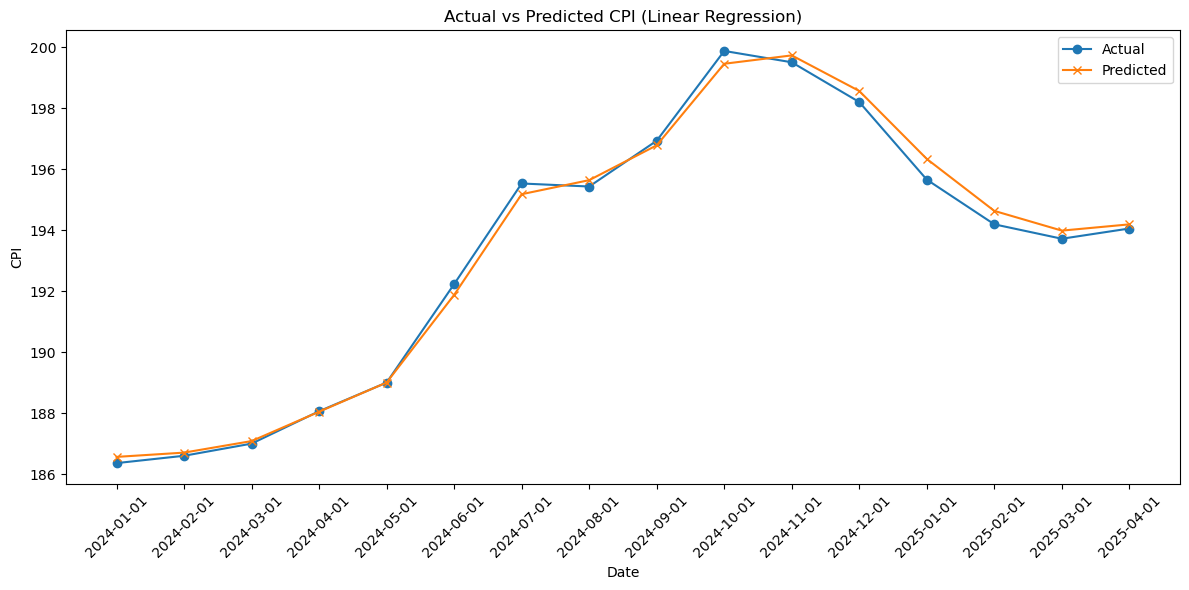

In [11]:
#Plotting actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_model["Date"], test_model[target], label="Actual", marker='o')
plt.plot(test_model["Date"], test_model["Predicted_CPI"], label="Predicted", marker='x')
plt.title("Actual vs Predicted CPI (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

An average error of 0.25–0.30 means within ~0.2%–0.3% error range.
A 0.25–0.30 CPI point error means it’s reliable for trend analysis and short-term forecasting.